In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
np.__version__

'1.20.3'

In [3]:
df = pd.read_csv(r'C:\Users\user\Desktop\CarPrice\data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


#### Question 2
How many records are in the dataset?

In [4]:
df.shape

(11914, 16)

11914

####  Question 3
Who are the most popular car manufacturers (top-3) according to the dataset?

In [5]:
df.Make.value_counts()

Chevrolet        1123
Ford              881
Volkswagen        809
Toyota            746
Dodge             626
Nissan            558
GMC               515
Honda             449
Mazda             423
Cadillac          397
Mercedes-Benz     353
Suzuki            351
BMW               334
Infiniti          330
Audi              328
Hyundai           303
Volvo             281
Subaru            256
Acura             252
Kia               231
Mitsubishi        213
Lexus             202
Buick             196
Chrysler          187
Pontiac           186
Lincoln           164
Oldsmobile        150
Land Rover        143
Porsche           136
Saab              111
Aston Martin       93
Plymouth           82
Bentley            74
Ferrari            69
FIAT               62
Scion              60
Maserati           58
Lamborghini        52
Rolls-Royce        31
Lotus              29
Tesla              18
HUMMER             17
Maybach            16
Alfa Romeo          5
McLaren             5
Spyker    

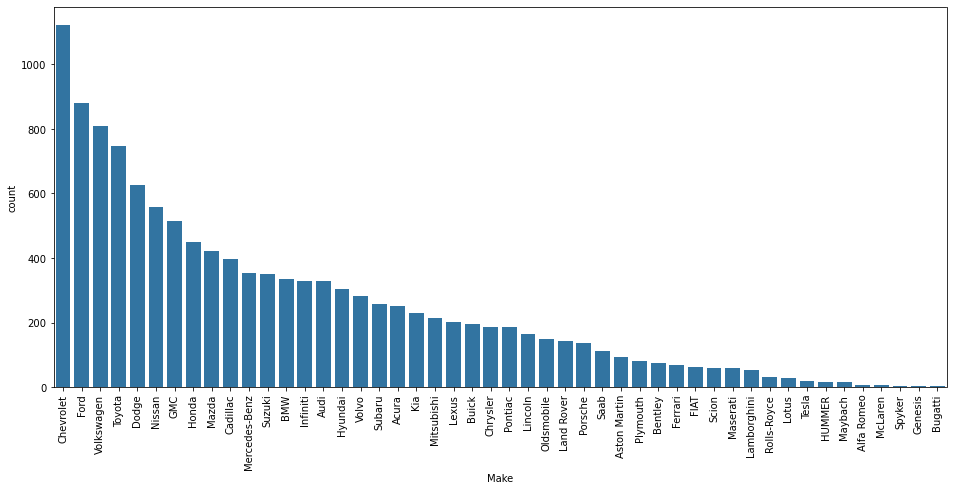

In [6]:
plt.figure(figsize=(16,7))
color = sns.color_palette()[0]
sns.countplot(data = df, x = 'Make',color = color, order =df.Make.value_counts().index)
plt.xticks(rotation=90)
plt.show()

#### Top 3 car make 
Chevrolet, ford, Volkswagen.

#### Question 4
What's the number of unique Audi car models in the dataset?

In [12]:
df.query("Make == 'Audi'").nunique()

Make                   1
Model                 34
Year                  20
Engine Fuel Type       5
Engine HP             40
Engine Cylinders       6
Transmission Type      3
Driven_Wheels          2
Number of Doors        2
Market Category       15
Vehicle Size           3
Vehicle Style          6
highway MPG           23
city mpg              18
Popularity             1
MSRP                 234
dtype: int64

answer: 34

#### Question 5
How many columns in the dataset have missing values?

In [15]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Five (5) columns have missing values.

#### Question 6
Find the median value of "Engine Cylinders" column in the dataset.
Next, calculate the most frequent value of the same "Engine Cylinders".
Use the fillna method to fill the missing values in "Engine Cylinders" with the most frequent value from the previous step.
Now, calculate the median value of "Engine Cylinders" once again.
Has it changed?

In [16]:
df['Engine Cylinders'].median()

6.0

In [17]:
df['Engine Cylinders'].mode()

0    4.0
dtype: float64

In [18]:
df['Engine Cylinders'].fillna(4.0, inplace=True)

In [19]:
df['Engine Cylinders'].median()

6.0

###### Answer:
no it hasnt changed.

#### Question 7
Select all the "Lotus" cars from the dataset.
Select only columns "Engine HP", "Engine Cylinders".
Now drop all duplicated rows using drop_duplicates method (you should get a dataframe with 9 rows).
Get the underlying NumPy array. Let's call it X.
Compute matrix-matrix multiplication between the transpose of X and X. To get the transpose, use X.T. Let's call the result XTX.
Invert XTX.
Create an array y with values [1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800].
Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w.
What's the value of the first element of w?

In [26]:
lotus_cars = df.query("Make == 'Lotus'")[['Engine HP', 'Engine Cylinders']]
lotus_cars

,Engine HP,Engine Cylinders
3912,189.0,4.0
3913,218.0,4.0
3914,189.0,4.0
3915,189.0,4.0
3916,218.0,4.0
3917,189.0,4.0
3918,217.0,4.0
3919,217.0,4.0
4216,350.0,8.0
4217,350.0,8.0


In [32]:
no_duplicate = lotus_cars.drop_duplicates()

In [34]:
X = np.array(no_duplicate)
X

array([[189.,   4.],
       [218.,   4.],
       [217.,   4.],
       [350.,   8.],
       [400.,   6.],
       [276.,   6.],
       [345.,   6.],
       [257.,   4.],
       [240.,   4.]])

In [48]:
trans = X.T

In [49]:
#matrix matrix multiplication
XTX = X.dot(trans)

In [50]:
#inverse 
inverse = np.linalg.inv(XTX)

In [61]:
y = np.array([1100, 800, 750, 850, 1300, 1000, 1000, 1300, 800])

In [66]:
# Multiply the inverse of XTX with the transpose of X, and then multiply the result by y. Call the result w
mul = trans.dot(inverse)

In [72]:
w = mul*y
w

array([[ 1.38710869e+20, -2.88230376e+19,  4.05323966e+19,
        -1.67116800e+08, -7.02561542e+19, -1.44115188e+20,
        -3.60287970e+19, -2.34187181e+19, -2.88230376e+19],
       [ 1.85773485e+18, -2.25179981e+17,  1.05553116e+18,
        -8.70400000e+05,  1.09775241e+18,  5.62949953e+17,
         2.81474977e+18, -1.82958735e+17, -2.02661983e+18]])